#José Ewerton Cordeiro e Cordeiro#
1- valores dos pixels de cinza; <br>
2- histograma de cinza; <br>
3- histograma de regiões; <br>
4- histograma de LBP por região.

Importando bibliotecas:

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report
from PIL import Image 
import cv2 as cv                     # opencv para manipulação de imagens
import numpy as np                   # numpy para manipulação de matrizes e arrays
import matplotlib.pyplot as plt      # pyplot para plotagem de gráficos e imagens
import urllib.request as url         # urllib para baixar arquivos via HTTPS
import zipfile                       # zipfile para lidar com pastas compactadas
import random                        # trabalhando com números randômicos
import math                          # math para lidar com funções matemáticas

Baixando imagens

In [ ]:
url.urlretrieve('https://github.com/Alyssonmach/pdi-labs/raw/main/imagens.zip', 'imagens.zip')
with zipfile.ZipFile('imagens.zip', 'r') as zip_ref:
    zip_ref.extractall('')

1 - Valores dos pixels de cinza: \\
(não entendi a questão)


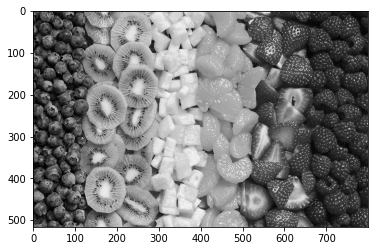

In [ ]:
#definindo imagem como cinza
image = cv.imread('imagens/frutas.jpg') #sugestão de imagens: lenna.jpg, frutas.jpg, leon.jpg
y_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(y_gray, cmap = 'gray')

2 - Histograma de cinza:

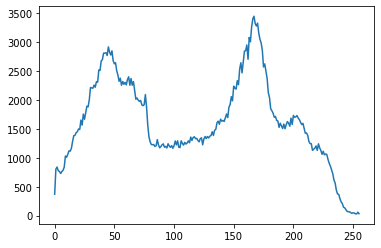

In [ ]:
hist = cv.calcHist([y_gray],[0],None,[256],[0,256])
plt.plot(hist)

3 - Histograma por regiões:

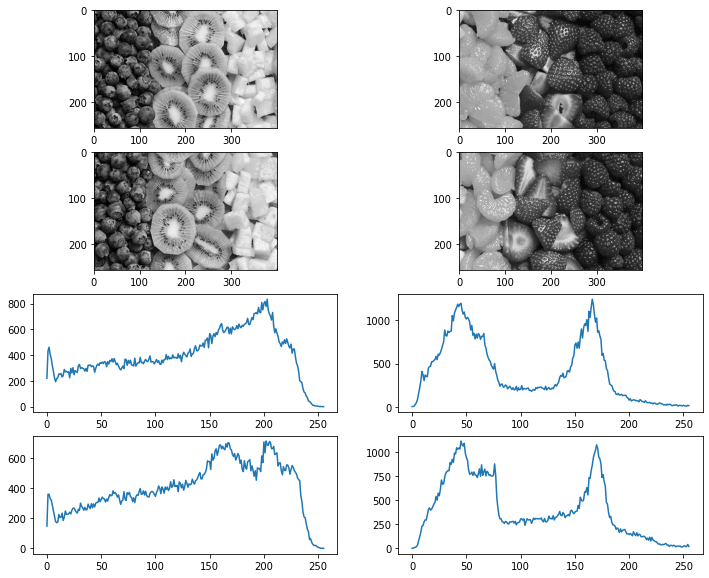

In [ ]:
#definindo tamanho da imagem
a , b = y_gray.shape

#tamanho da imagem dividido por dois
a_met = int(a/2)
b_met = int(b/2)

#criando matrizes para separar as imagens
y1 = np.zeros((a_met, b_met), dtype =  int)
y2 = np.zeros((a_met, b_met), dtype =  int)
y3 = np.zeros((a_met, b_met), dtype =  int)
y4 = np.zeros((a_met, b_met), dtype =  int)

#definindo e plotando as imagens
y1 = y_gray[0:a_met, 0:b_met]
y2 = y_gray[0:a_met, b_met:b]
y3 = y_gray[a_met:a, 0:b_met]
y4 = y_gray[a_met:a, b_met:b]

fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize=(12, 10))

axs[0][0].imshow(y1, cmap = 'gray')
axs[0][1].imshow(y2, cmap = 'gray')
axs[1][0].imshow(y3, cmap = 'gray')
axs[1][1].imshow(y4, cmap = 'gray')

#calculando e plotando histograma
histr1 = cv.calcHist([y1],[0],None,[256],[0,256])
histr2 = cv.calcHist([y2],[0],None,[256],[0,256]) 
histr3 = cv.calcHist([y3],[0],None,[256],[0,256]) 
histr4 = cv.calcHist([y4],[0],None,[256],[0,256])  

axs[2][0].plot(histr1)
axs[2][1].plot(histr2)
axs[3][0].plot(histr3)
axs[3][1].plot(histr4)

4 - Algoritimo LBP por região:

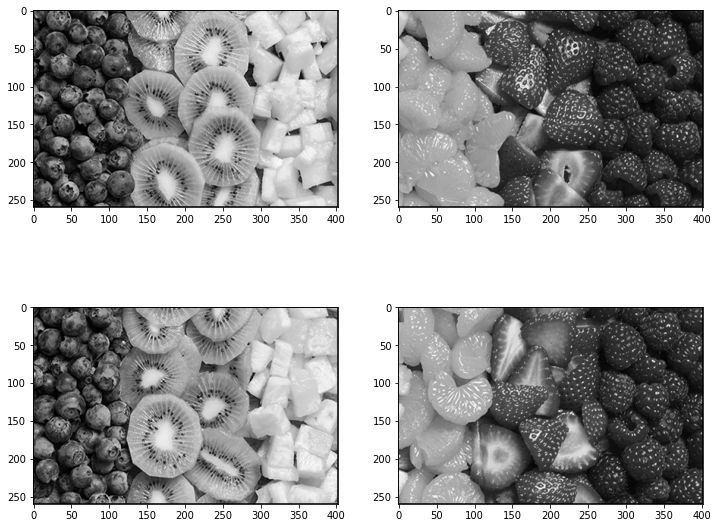

In [ ]:
#criando uma matriz com um pixel a mais nas bordas
y_aux1 = np.zeros((a_met+2,b_met+2), dtype=int)

y_aux1[1:a_met+1, 1:b_met+1] = y1[0:a_met, 0:b_met]
y_aux1[1:a_met+1, 1:b_met+1] = y1[0:a_met, 0:b_met]
y_aux1[1:a_met+1, 1:b_met+1] = y1[0:a_met, 0:b_met]

y_aux2 = np.zeros((a_met+2,b_met+2), dtype=int)

y_aux2[1:a_met+1, 1:b_met+1] = y2[0:a_met, 0:b_met]
y_aux2[1:a_met+1, 1:b_met+1] = y2[0:a_met, 0:b_met]
y_aux2[1:a_met+1, 1:b_met+1] = y2[0:a_met, 0:b_met]

y_aux3 = np.zeros((a_met+2,b_met+2), dtype=int)

y_aux3[1:a_met+1, 1:b_met+1] = y3[0:a_met, 0:b_met]
y_aux3[1:a_met+1, 1:b_met+1] = y3[0:a_met, 0:b_met]
y_aux3[1:a_met+1, 1:b_met+1] = y3[0:a_met, 0:b_met]

y_aux4 = np.zeros((a_met+2,b_met+2), dtype=int)

y_aux4[1:a_met+1, 1:b_met+1] = y4[0:a_met, 0:b_met]
y_aux4[1:a_met+1, 1:b_met+1] = y4[0:a_met, 0:b_met]
y_aux4[1:a_met+1, 1:b_met+1] = y4[0:a_met, 0:b_met]

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(12, 10))

axs[0][0].imshow(y_aux1, cmap = 'gray')
axs[0][1].imshow(y_aux2, cmap = 'gray')
axs[1][0].imshow(y_aux3, cmap = 'gray')
axs[1][1].imshow(y_aux4, cmap = 'gray')

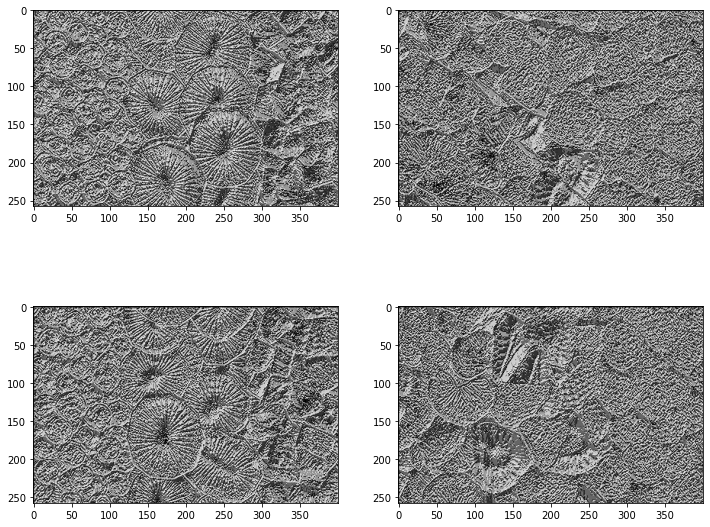

In [ ]:
#função para determinar vetor de convolução
def determ_Vet(x):
  vet = []
  if(x[0][1] > x[1][1]):
    vet.append('1')
  else:
    vet.append('0')
  if(x[1][0] > x[1][1]):
    vet.append('1')
  else:
    vet.append('0')
  if(x[2][1] > x[1][1]):
    vet.append('1')
  else:
    vet.append('0')
  if(x[1][2] > x[1][1]):
    vet.append('1')
  else:
    vet.append('0')
  var = "".join(vet)
  return int(var)
  
#função para converter de binario para decimal
def convert_b2d(binary):
  binary1 = binary 
  decimal, i, n = 0, 0, 0
  while(binary != 0): 
      dec = binary % 10
      decimal = decimal + dec * pow(2, i) 
      binary = binary//10
      i += 1
  return(decimal) 

#função para aplicar a convolução
def convolv(mat, a, b):
  x = np.zeros((3,3))
  matConvolv = np.zeros((a_met,b_met), dtype=int)
  for (i) in range(0,a_met):
    for (j) in range(0,b_met):
      x = np.array([[0,mat[i-1,j],0], 
                  [mat[i,j-1],mat[i,j],mat[i,j+1]], 
                  [0,mat[i+1,j],0]])
      var_bin = determ_Vet(x)
      var_dec = convert_b2d(var_bin)
      matConvolv[i][j] = var_dec
  return matConvolv

#definindo a imagem convoluida
yConvolv1 = np.zeros((a_met,b_met), dtype=int)
yConvolv2 = np.zeros((a_met,b_met), dtype=int)
yConvolv3 = np.zeros((a_met,b_met), dtype=int)
yConvolv4 = np.zeros((a_met,b_met), dtype=int)

yConcolv1 = convolv(y_aux1, a, b)
yConcolv2 = convolv(y_aux2, a, b)
yConcolv3 = convolv(y_aux3, a, b)
yConcolv4 = convolv(y_aux4, a, b)

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(12, 10))

axs[0][0].imshow(yConcolv1, cmap = 'gray')
axs[0][1].imshow(yConcolv2, cmap = 'gray')
axs[1][0].imshow(yConcolv3, cmap = 'gray')
axs[1][1].imshow(yConcolv4, cmap = 'gray')